# Cluster
Unsupervised learning example: detect clusters in Fisher's iris dataset.

In [1]:
%autosave 0

from tools import *
from learn import Cluster
from plot import Plot

plot = Plot(figsize=(5,3))

Autosave disabled


## get data

Normalize columns to avoid accidentally ignoring smaller columns.

In [2]:
clues = irisdata()
answers = clues.pop('species')
clues = zscores(clues)
clues.join(answers)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.015602,-1.335752,-1.311052,setosa
1,-1.139200,-0.131539,-1.335752,-1.311052,setosa
2,-1.380727,0.327318,-1.392399,-1.311052,setosa
3,-1.501490,0.097889,-1.279104,-1.311052,setosa
4,-1.018437,1.245030,-1.335752,-1.311052,setosa
...,...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994,virginica
146,0.551486,-1.278680,0.703564,0.919223,virginica
147,0.793012,-0.131539,0.816859,1.050416,virginica
148,0.430722,0.786174,0.930154,1.443994,virginica


## build a Cluster tree
Input numerical columns to calculate a SciPy *linkage matrix*.

In [3]:
cluster = Cluster(clues)
cluster.links

,a,b,distance,count
0,101,142,0.000000,2
1,13,38,0.000074,2
2,82,92,0.000612,2
3,29,47,0.000818,2
4,17,40,0.001022,2
...,...,...,...,...
144,283,291,0.248652,51
145,293,294,0.418069,74
146,288,292,0.529738,27
147,295,296,0.936590,101


## show the tree
Limit the number of branches for easier/faster viewing.

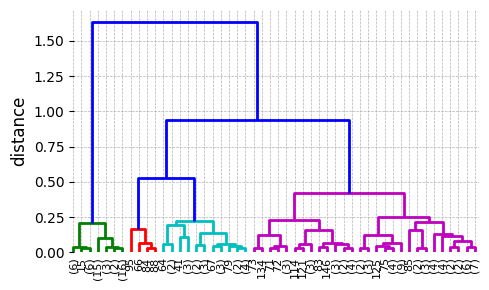

In [4]:
axes = plot.linkage(cluster.links, 50)

## choose clusters
Call to assign each row a cluster number starting with 0.<br>
Call with category labels for Categorical clusters.

In [5]:
cluster(5)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    1
147    2
148    2
149    2
Name: cluster, Length: 150, dtype: int32

In [6]:
cluster(5, cats=list('abcde'))

0      a
1      a
2      a
3      a
4      a
      ..
145    c
146    b
147    c
148    c
149    c
Name: cluster, Length: 150, dtype: category
Categories (5, object): [a, b, c, d, e]

## check results
How closely do the clusters agree with the actual species?

species,setosa,versicolor,virginica
cluster,,,
0,49,0,0
1,0,25,49
2,1,25,1


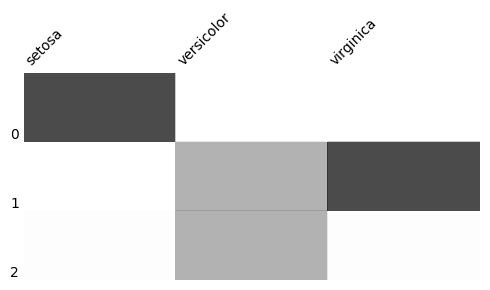

In [7]:
cluster = Cluster(clues)
confusion = crosstab(cluster(3), answers)
plot.heat(confusion, cmap='Greys')
confusion

## cluster with another method

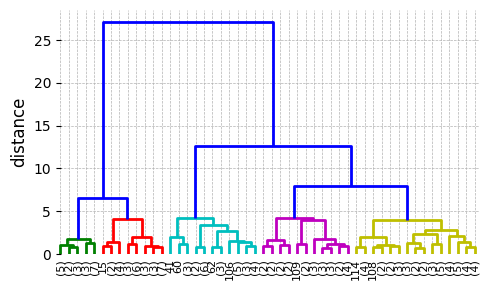

In [8]:
ward = Cluster(clues, method='ward', metric='euclidean')
plot.linkage(ward.links, 50, color_threshold=5)

species,setosa,versicolor,virginica
cluster,,,
0,49,0,0
1,1,27,2
2,0,23,48


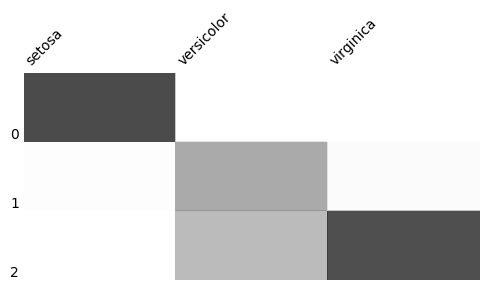

In [9]:
confusion = crosstab(ward(3), answers)
plot.heat(confusion, cmap='Greys')
confusion

## help

In [10]:
help(Cluster)

Help on class Cluster in module learn:

class Cluster(builtins.object)
 |  Cluster(data, **kwargs)
 |  
 |  Assign each row of a table to exactly one cluster.
 |  Input numeric observations, then call to return a Series.
 |  Each row of input matrix is assigned to exactly one cluster.
 |  
 |  Constructor inputs:
 |      data        DataFrame: Numeric columns with or without index.
 |      **kwargs    are passed to scipy.cluster.hierarchy.linkage().
 |  
 |  Call inputs:
 |      n           int: Maximum number of distinct clusters.
 |      cats        optional Iterable: Category labels for clusters.
 |      **kwargs    are passed to scipy.cluster.hierarchy.fcluster().
 |  
 |  See scipy.cluster.hierarchy docs for more information.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, n, cats=(), **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, data, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  __repr